In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('TVC_USOIL, 1M.csv')
df['time'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df['MoM_pct_change_close']= df['close'].pct_change(fill_method ='ffill')*100
df['monthly_rate_diff'] = df["USINTR, FEDERAL RESERVE: Open"].diff(periods = 1)

df.drop(columns = ['Basis' ,'Upper','Lower','EMA','USINTR, FEDERAL RESERVE: Open','USINTR, FEDERAL RESERVE: High','USINTR, FEDERAL RESERVE: Low','Smoothing Line','MA','Smoothing Line','Plot','Plot','MA','Smoothing Line','Volume','Volume MA', 'Smoothing Line.1', 'Plot.1','MA.1','Smoothing Line.2'], inplace=True)
# filter the time
filt = (df['time'] > '1975')

df[filt]

,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
74,1975-03-31,11.160,11.160,11.160,11.160,5.25,0.000000,-2.50
75,1975-04-30,11.160,11.160,11.160,11.160,5.25,0.000000,-0.25
76,1975-06-30,11.160,11.160,11.160,11.160,6.50,0.000000,1.25
77,1975-07-31,11.160,11.160,11.160,11.160,6.50,0.000000,0.00
78,1975-08-31,11.160,11.160,11.160,11.160,6.50,0.000000,0.00
...,...,...,...,...,...,...,...,...
613,2022-05-01,103.885,119.958,98.225,115.260,1.00,10.693878,0.50
614,2022-05-31,115.330,123.659,101.563,105.985,1.75,-8.047024,0.75
615,2022-06-30,105.950,111.421,90.582,98.282,2.50,-7.268010,0.75
616,2022-07-31,98.282,98.626,85.742,88.796,NaN,-9.651818,NaN


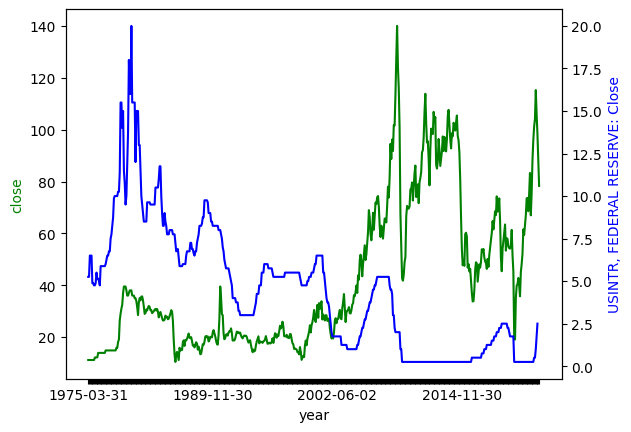

In [12]:
# set timeframe as you whish
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['close']
y2 = df_tf['USINTR, FEDERAL RESERVE: Close']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('close', color='g')
ax2.set_ylabel('USINTR, FEDERAL RESERVE: Close', color='b')

plt.show()

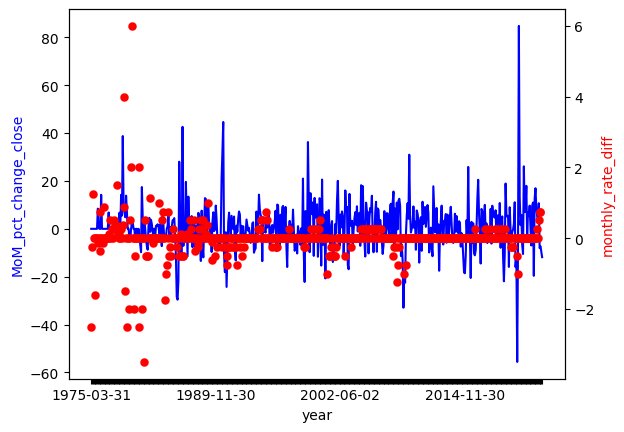

In [15]:
# set timeframe as you whish 
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['MoM_pct_change_close']
y2 = df_tf['monthly_rate_diff']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.scatter(x, y2, marker='o', linewidths= 0.1, c= 'red')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('MoM_pct_change_close', color='b')
ax2.set_ylabel('monthly_rate_diff', color='r')

#observe % price changes plotet along monthly rate changes
plt.show()

In [13]:
#observe correlation 
filt = (df['time'] > '1975')
df_tf = df[filt] 

df_tf['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

-0.5324209649959831

In [6]:
# we are interested in positive correlation in rising rates environments
filt = (df['time'] > '1975')
df_tf = df[filt] 

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21083/3927801379.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf[filt2]


,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
76,1975-06-30,11.160,11.160,11.160,11.160,6.50,0.000000,1.25
84,1976-05-31,12.170,12.170,12.170,12.170,5.50,0.000000,0.75
89,1976-11-30,13.900,13.900,13.900,13.900,5.88,0.000000,0.88
96,1977-08-31,14.850,14.850,14.850,14.850,6.25,0.000000,0.12
97,1977-10-31,14.850,14.850,14.850,14.850,6.50,0.000000,0.50
...,...,...,...,...,...,...,...,...
569,2018-09-02,69.880,73.700,66.890,73.490,2.25,0.051811,0.25
572,2018-12-02,50.640,54.540,42.400,45.400,2.50,-0.103298,0.25
613,2022-05-01,103.885,119.958,98.225,115.260,1.00,0.106939,0.50
614,2022-05-31,115.330,123.659,101.563,105.985,1.75,-0.080470,0.75


In [7]:
filt = (df['time'] > '1975')
df_tf = df[filt]

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

df_tf_high_rates_with_hiking = df_tf[filt2]

#calculate correlation in risig rates environemnts
df_tf_high_rates_with_hiking['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21083/2001452413.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf[filt2]
/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21083/2001452413.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf_high_rates_with_hiking = df_tf[filt2]


-0.48700187420406

/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21083/2620170735.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf[filt2]
/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21083/2620170735.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf_high_rates_with_hiking = df_tf[filt2]


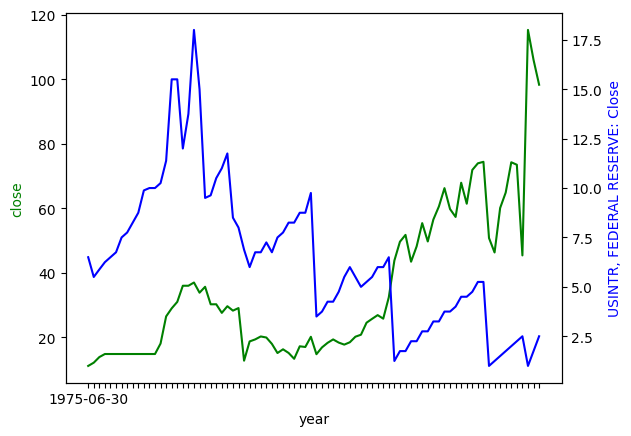

In [8]:
# set timeframe as you whish
filt = (df['time'] > '1975')
df_tf = df[filt] 

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

df_tf_high_rates_with_hiking = df_tf[filt2]


x = df_tf_high_rates_with_hiking['time']
y1 = df_tf_high_rates_with_hiking['close']
y2 = df_tf_high_rates_with_hiking['USINTR, FEDERAL RESERVE: Close']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('close', color='g')
ax2.set_ylabel('USINTR, FEDERAL RESERVE: Close', color='b')

plt.show()